In [3]:
from hossam import load_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler, StandardScaler

my_dpi = 200

In [4]:
origin = load_data("game_usage")
origin

게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109
...,...,...
95,47,939
96,50,485
97,13,916
98,79,235


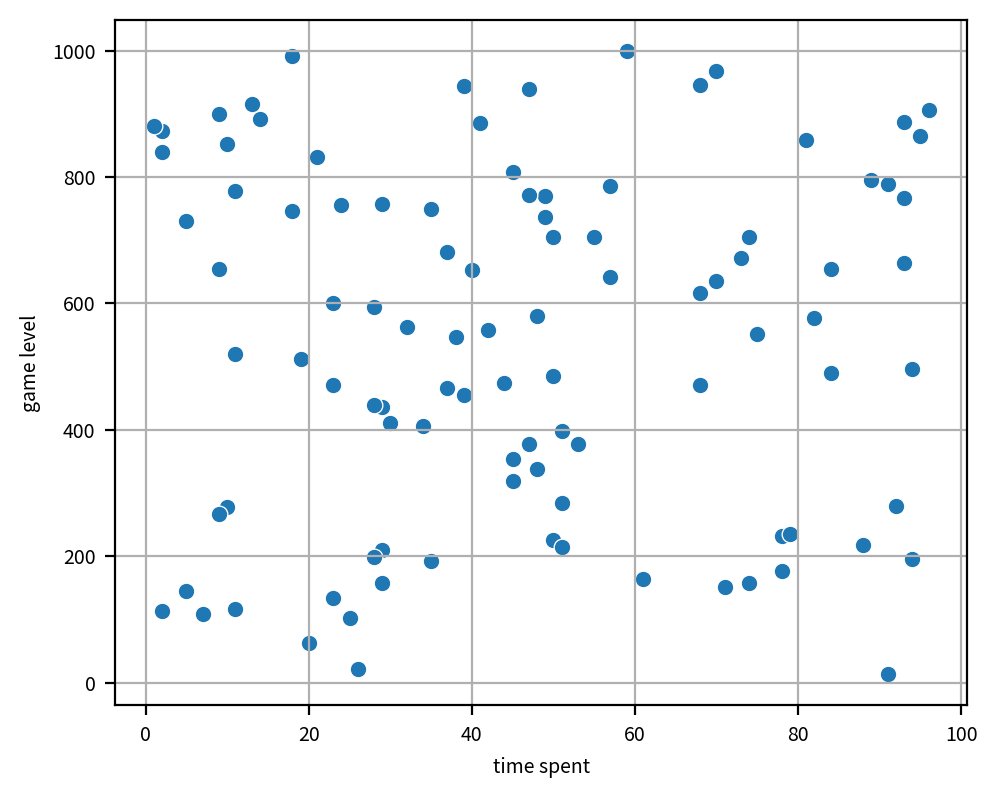

In [5]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1000
height_px = 800
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.scatterplot(data=origin, x="time spent", y="game level")

# 3) 그래프 꾸미기
ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

In [ ]:
estimator = KMeans(n_clusters=4)

estimator.fit(origin)

cluster_pred = estimator.predict(origin)
cluster_pred

array([0, 3, 3, 0, 2, 3, 1, 1, 2, 1, 0, 3, 2, 1, 0, 2, 3, 2, 0, 3, 3, 0,
       2, 3, 2, 0, 3, 2, 1, 1, 3, 3, 1, 2, 3, 3, 1, 2, 2, 0, 1, 3, 0, 3,
       0, 3, 3, 1, 3, 2, 1, 2, 2, 2, 1, 0, 2, 3, 0, 1, 2, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 3, 1, 0, 2, 1, 3, 1,
       2, 2, 3, 3, 1, 3, 0, 0, 1, 0, 2, 1], dtype=int32)

In [7]:
df = origin.copy()
df["그룹번호"] = cluster_pred
df

,time spent,game level,그룹번호
0,39,944,0
1,55,705,3
2,29,757,3
3,59,999,0
4,7,109,2
...,...,...,...
95,47,939,0
96,50,485,1
97,13,916,0
98,79,235,2


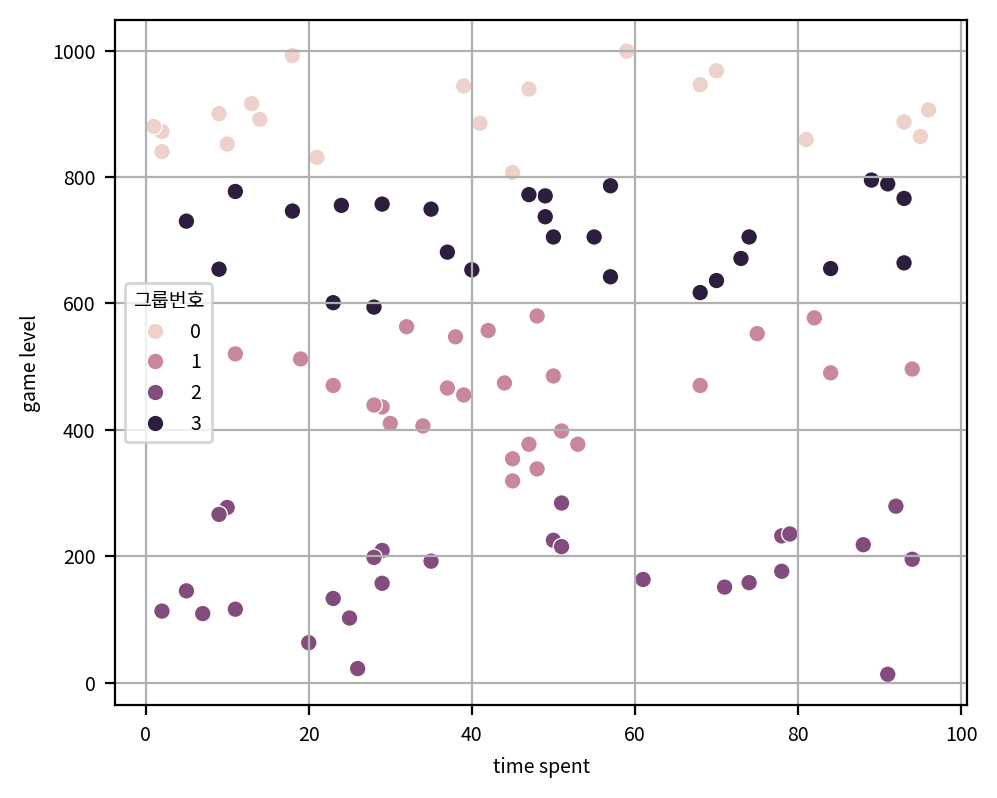

In [8]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1000
height_px = 800
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.scatterplot(data=df, x="time spent", y="game level", hue="그룹번호")

# 3) 그래프 꾸미기
ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

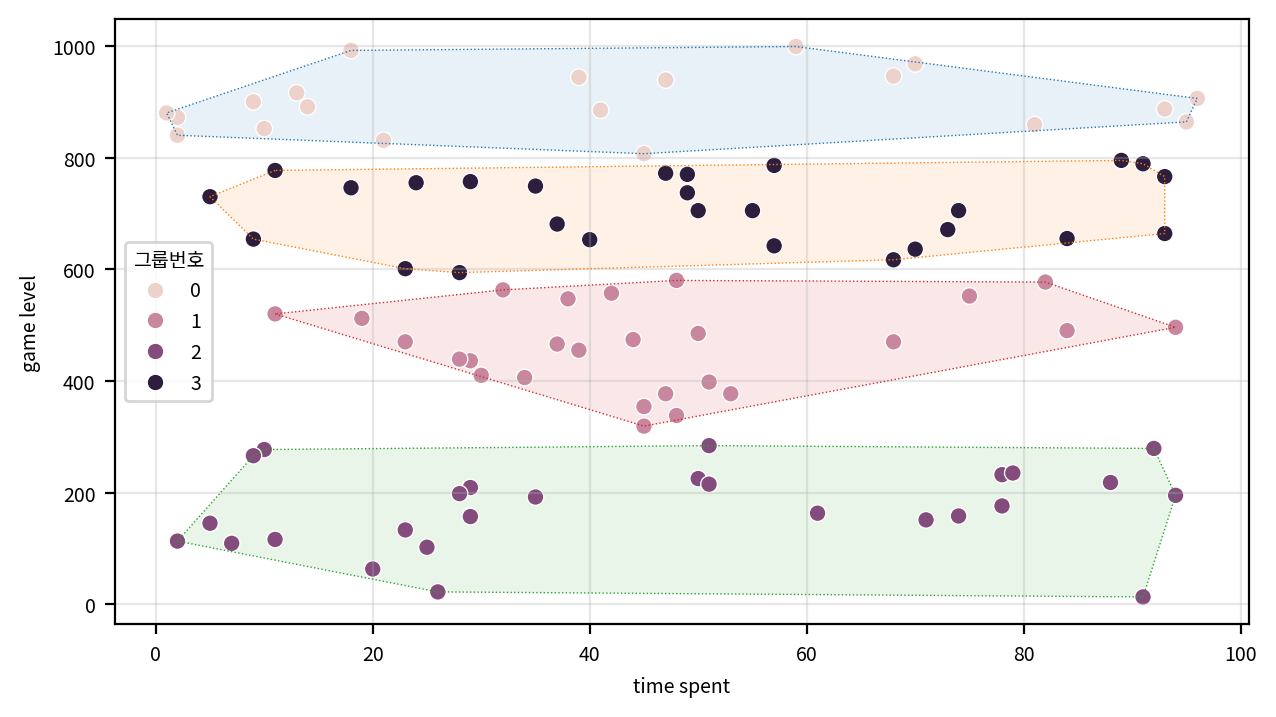

In [9]:
# 1) 그래프 초기화
width_px = 1280  # 그래프 가로 크기
height_px = 720  # 그래프 세로 크기
rows = 1  # 그래프 행 수
cols = 1  # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# ------------------------------
# 고급진 코드~!!
# ------------------------------
# 군집별 값의 주로분포로 반복
for c in df["그룹번호"].unique():
    # 값의 종류별로 데이터프레임을 나눔
    df_c = df.loc[df["그룹번호"] == c, ["time spent", "game level"]]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(  # type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=":"
        )

        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=df, x="time spent", y="game level", hue="그룹번호", ax=ax)
ax.grid(True, alpha=0.3)  # 배경 격자 표시
plt.tight_layout()  # 여백 제거
plt.show()  # 그래프 화면 출력
plt.close()  # 그래프 작업 종료

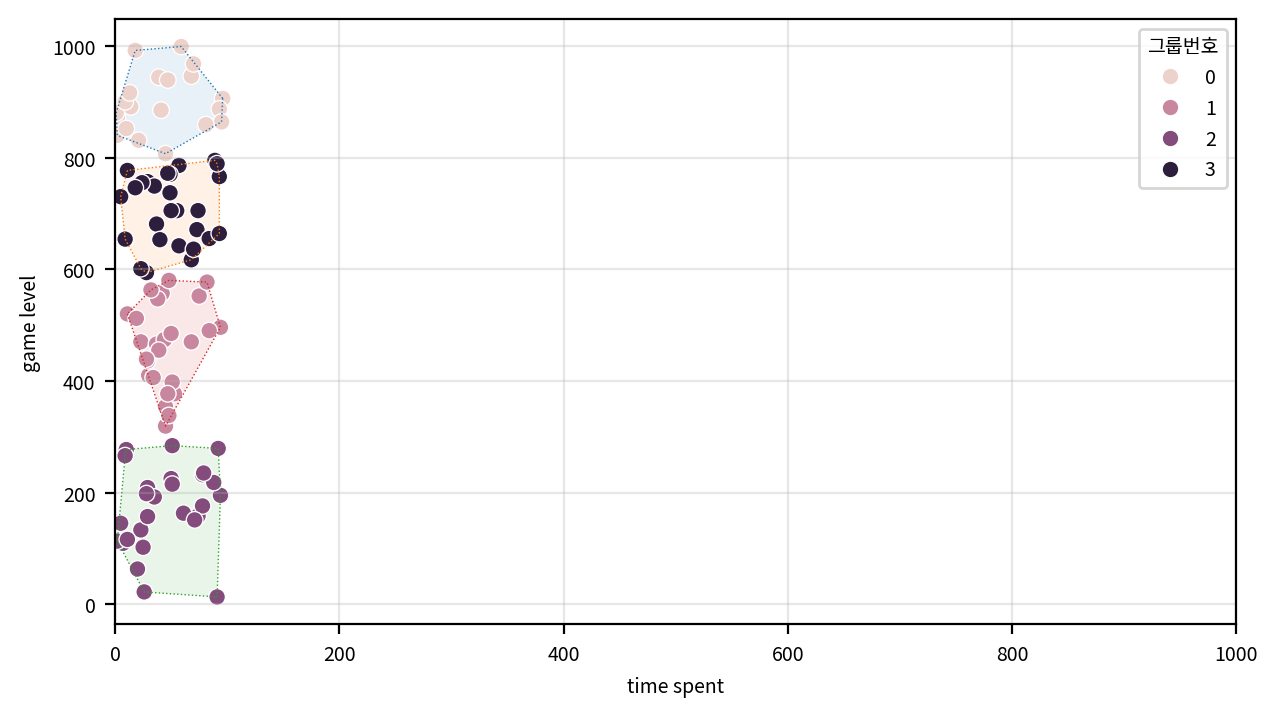

In [10]:
# 1) 그래프 초기화
width_px = 1280  # 그래프 가로 크기
height_px = 720  # 그래프 세로 크기
rows = 1  # 그래프 행 수
cols = 1  # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# ------------------------------
# 고급진 코드~!!
# ------------------------------
# 군집별 값의 주로분포로 반복
for c in df["그룹번호"].unique():
    # 값의 종류별로 데이터프레임을 나눔
    df_c = df.loc[df["그룹번호"] == c, ["time spent", "game level"]]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(  # type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=":"
        )

        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=df, x="time spent", y="game level", hue="그룹번호", ax=ax)
ax.grid(True, alpha=0.3)  # 배경 격자 표시
ax.set_xlim([0, 1000])
plt.tight_layout()  # 여백 제거
plt.show()  # 그래프 화면 출력
plt.close()  # 그래프 작업 종료

In [11]:
scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(origin), columns=origin.columns)
sdf

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
...,...,...
95,0.037881,1.456640
96,0.146111,-0.192688
97,-1.188727,1.373084
98,1.192335,-1.100909


In [13]:
estimator = KMeans(n_clusters=4)

estimator.fit(sdf)

cluster = estimator.predict(sdf)
sdf["그룹번호"] = cluster
sdf

,time spent,game level,그룹번호
0,-0.250733,1.474805,2
1,0.326494,0.606546,0
2,-0.611500,0.795456,2
3,0.470801,1.674613,0
4,-1.405187,-1.558652,3
...,...,...,...
95,0.037881,1.456640,0
96,0.146111,-0.192688,1
97,-1.188727,1.373084,2
98,1.192335,-1.100909,1


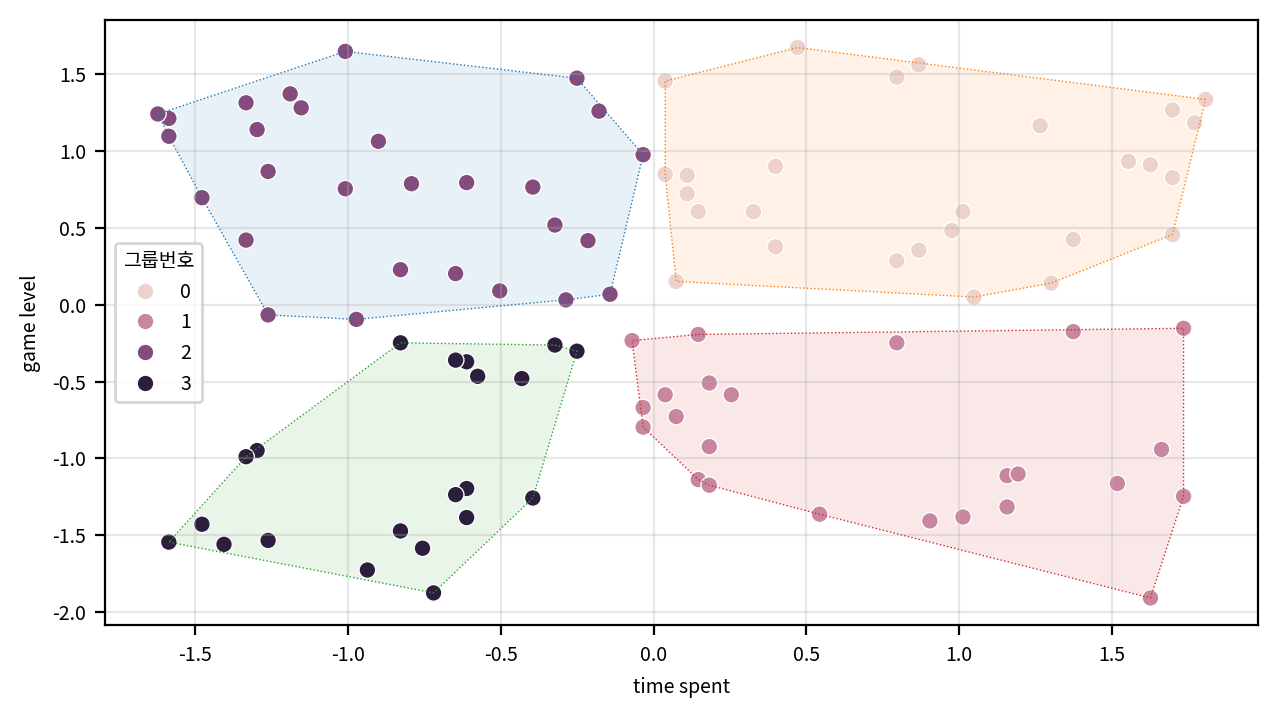

In [17]:
# 1) 그래프 초기화
width_px = 1280  # 그래프 가로 크기
height_px = 720  # 그래프 세로 크기
rows = 1  # 그래프 행 수
cols = 1  # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# ------------------------------
# 고급진 코드~!!
# ------------------------------
# 군집별 값의 주로분포로 반복
for c in sdf["그룹번호"].unique():
    # 값의 종류별로 데이터프레임을 나눔
    df_c = sdf.loc[sdf["그룹번호"] == c, ["time spent", "game level"]]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(  # type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=":"
        )

        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=sdf, x="time spent", y="game level", hue="그룹번호")
ax.grid(True, alpha=0.3)  # 배경 격자 표시
plt.tight_layout()  # 여백 제거
plt.show()  # 그래프 화면 출력
plt.close()  # 그래프 작업 종료

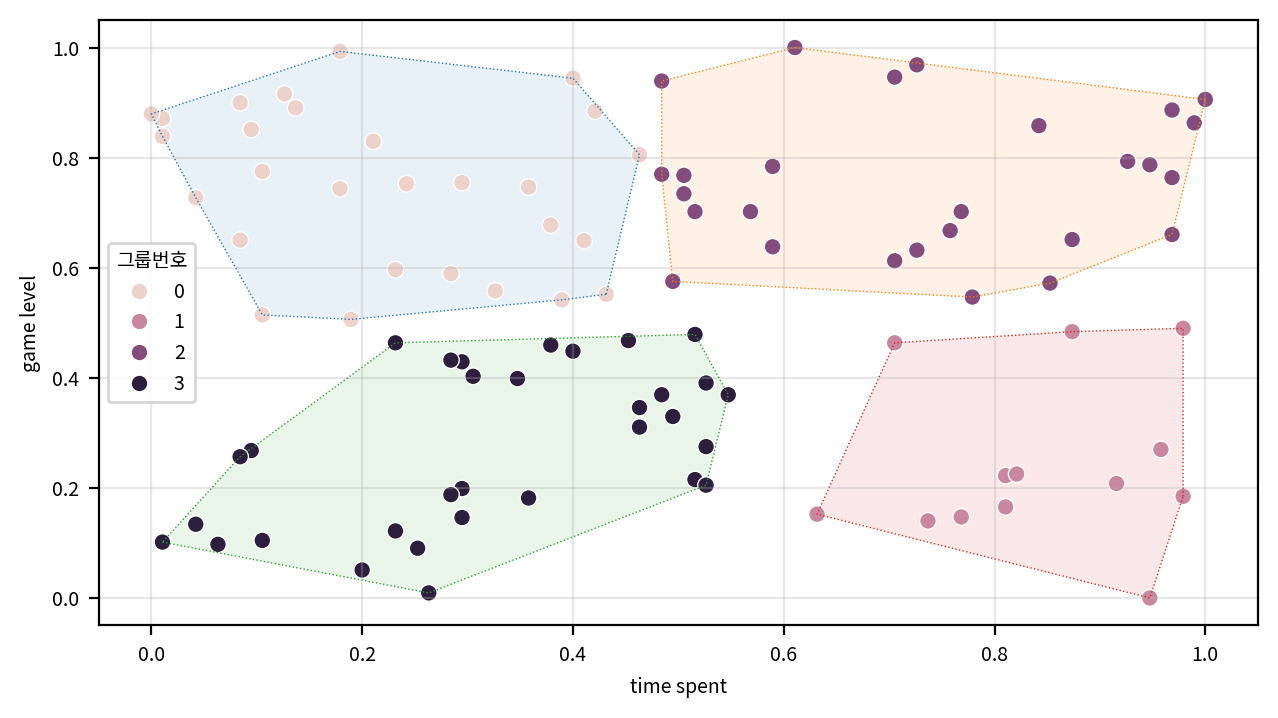

In [19]:
scaler = MinMaxScaler()
mdf = DataFrame(scaler.fit_transform(origin), columns=origin.columns)

# 모델 객체 생성
estimator = KMeans(n_clusters=4)

# 모델 학습
estimator.fit(mdf)

# 예측
cluster = estimator.predict(mdf)
mdf["그룹번호"] = cluster


# 1) 그래프 초기화
width_px = 1280  # 그래프 가로 크기
height_px = 720  # 그래프 세로 크기
rows = 1  # 그래프 행 수
cols = 1  # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# ------------------------------
# 고급진 코드~!!
# ------------------------------
# 군집별 값의 주로분포로 반복
for c in mdf["그룹번호"].unique():
    # 값의 종류별로 데이터프레임을 나눔
    df_c = mdf.loc[mdf["그룹번호"] == c, ["time spent", "game level"]]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(  # type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=":"
        )

        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=mdf, x="time spent", y="game level", hue="그룹번호", ax=ax)
ax.grid(True, alpha=0.3)  # 배경 격자 표시
plt.tight_layout()  # 여백 제거
plt.show()  # 그래프 화면 출력
plt.close()  # 그래프 작업 종료